In [1]:
# Execute sudo pip3 install scikit-image for the skimage
import os
import random
import skimage.data
import skimage.transform
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.python.framework import ops
import warnings
import random
import os

warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
ops.reset_default_graph()
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

Train_IMAGE_DIR = "E:\Local Disk F_122120182042\Python\Belgium_TS"
Test_IMAGE_DIR = "E:\Local Disk F_122120182042\Python\Belgium_TS"
def load_data(data_dir):
   #Loads a data set and returns two lists:
    
    #images: a list of Numpy arrays, each representing an image.
    #labels: a list of numbers that represent the images labels.
   # """
    # Get all the subdirectories of the data folder (i.e. traing or test). Each folder represents an unique label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    
    # Iterate for loop through the label directories and collect the data in two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) for f in os.listdir(label_dir) if f.endswith(".ppm")]

        # For each label, load it's images and add them to the images list.
        # And add the label number (i.e. directory name) to the labels list.
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels

# Load training and testing datasets.
train_data_dir = os.path.join(Train_IMAGE_DIR, "Training")
test_data_dir = os.path.join(Test_IMAGE_DIR, "Testing")

images, labels = load_data(train_data_dir)

In [83]:
print("Unique classes: {0} \nTotal Images: {1}".format(len(set(labels)), len(images)))


Unique classes: 62 
Total Images: 4575


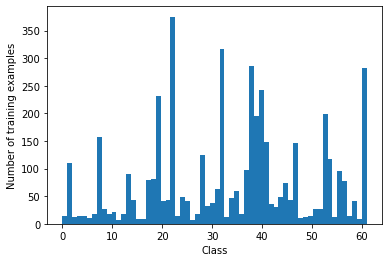

In [84]:
# Make a histogram with 62 bins of the `labels` data and show the plot: 
plt.hist(labels, 62)
plt.xlabel('Class')
plt.ylabel('Number of training examples')
plt.show()

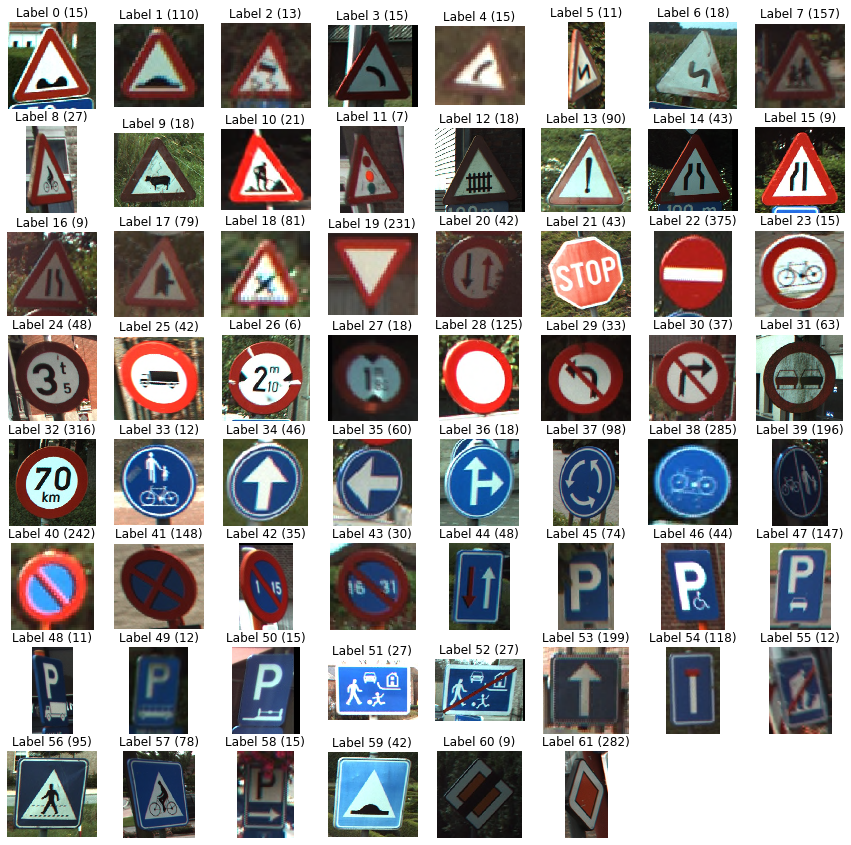

In [2]:
def display_images_and_labels(images, labels):
    #Display the first image of each label."""
    unique_labels = set(labels)
    plt.figure(figsize=(15, 15))
    i = 1
    for label in unique_labels:
        # Pick the first image for each label.
        image = images[labels.index(label)]
        plt.subplot(8, 8, i)  # A grid of 8 rows x 8 columns
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image)
    plt.show()

display_images_and_labels(images, labels)

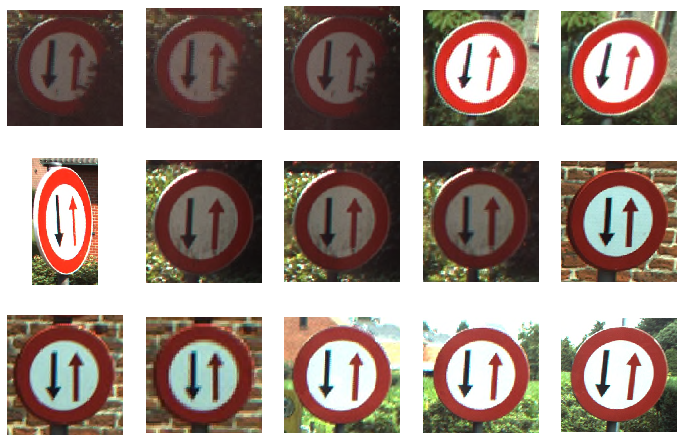

shape: (141, 142, 3), min: 0, max: 255
shape: (120, 123, 3), min: 0, max: 255
shape: (105, 107, 3), min: 0, max: 255
shape: (94, 105, 3), min: 7, max: 255
shape: (128, 139, 3), min: 0, max: 255


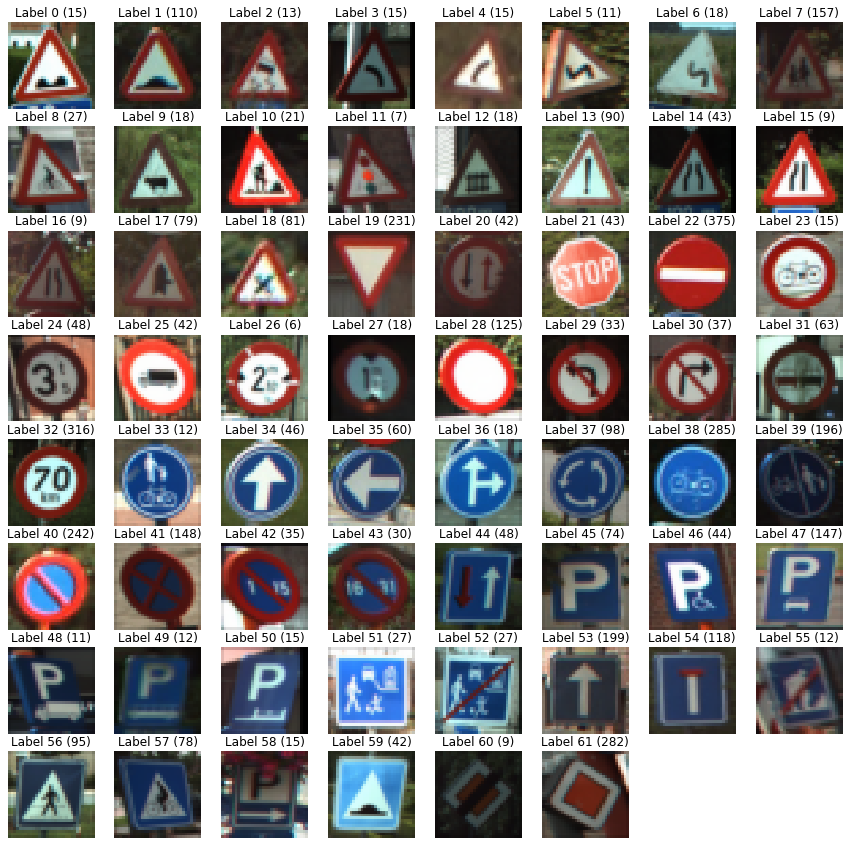

shape: (32, 32, 3), min: 0.03529411764705882, max: 0.996078431372549
shape: (32, 32, 3), min: 0.03395373774509819, max: 0.996078431372549
shape: (32, 32, 3), min: 0.03694182751225482, max: 0.996078431372549
shape: (32, 32, 3), min: 0.06296913296568628, max: 0.9191425398284312
shape: (32, 32, 3), min: 0.06035539215686275, max: 0.9028492647058822
labels:  (4575,) 
images:  (4575, 32, 32, 3)


In [3]:

def display_label_images(images, label):
    #Display images of a specific label."""
    limit = 15  # show a max of 15 images
    plt.figure(figsize=(12, 8))
    i = 1

    start = labels.index(label)
    end = start + labels.count(label)
    for image in images[start:end][:limit]:
        plt.subplot(3, 5, i)  # 3 rows, 5 per row
        plt.axis('off')
        i += 1
        plt.imshow(image)
    plt.show()

# Now let's display 10 random images
display_label_images(images, 20)

for img in images[:5]:
    print("shape: {0}, min: {1}, max: {2}".format(img.shape, img.min(), img.max()))
	
# Then we resize images
images32 = [skimage.transform.resize(img, (32, 32), mode='constant') for img in images]
display_images_and_labels(images32, labels)

for img in images32[:5]:
    print("shape: {0}, min: {1}, max: {2}".format(img.shape, img.min(), img.max()))
	
labels_array = np.array(labels)
images_array = np.array(images32)
print("labels: ", labels_array.shape, "\nimages: ", images_array.shape)




In [10]:
random_indexes = random.sample(range(len(images_array)),4575)
random_images = [images_array[i] for i in random_indexes]
random_labels = [labels_array[i] for i in random_indexes]
random_labels = np.array(random_labels)
random_images = np.array(random_images)

In [11]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
model = Sequential()

model.add(Conv2D(128, (6, 6), input_shape=images_array.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (4, 4)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(512))
model.add(Dropout(0.2))
model.add(Dense(62))
model.add(Activation('sigmoid'))
model.summary()
#model.compile(loss='binary_crossentropy',
#              optimizer='adam',
#              metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 27, 27, 128)       13952     
_________________________________________________________________
activation_3 (Activation)    (None, 27, 27, 128)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 256)       524544    
_________________________________________________________________
activation_4 (Activation)    (None, 10, 10, 256)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)             

In [12]:
opt = tf.keras.optimizers.Adam(lr=0.1, decay=1e-3)

In [13]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model.fit(random_images, random_labels, batch_size=32, epochs=4, validation_split=0.2)

Train on 3660 samples, validate on 915 samples
Epoch 1/4
3660/3660 [==============================] - 195s 53ms/sample - loss: 2.9842 - accuracy: 0.2246 - val_loss: 1.3469 - val_accuracy: 0.6514
Epoch 2/4
3660/3660 [==============================] - 212s 58ms/sample - loss: 0.8410 - accuracy: 0.7776 - val_loss: 0.4267 - val_accuracy: 0.8765
Epoch 3/4
3660/3660 [==============================] - 194s 53ms/sample - loss: 0.3350 - accuracy: 0.9057 - val_loss: 0.2383 - val_accuracy: 0.9268
Epoch 4/4
3660/3660 [==============================] - 195s 53ms/sample - loss: 0.2156 - accuracy: 0.9383 - val_loss: 0.2096 - val_accuracy: 0.9475


In [15]:
model.save('traffic-CNN.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: traffic-CNN.model\assets


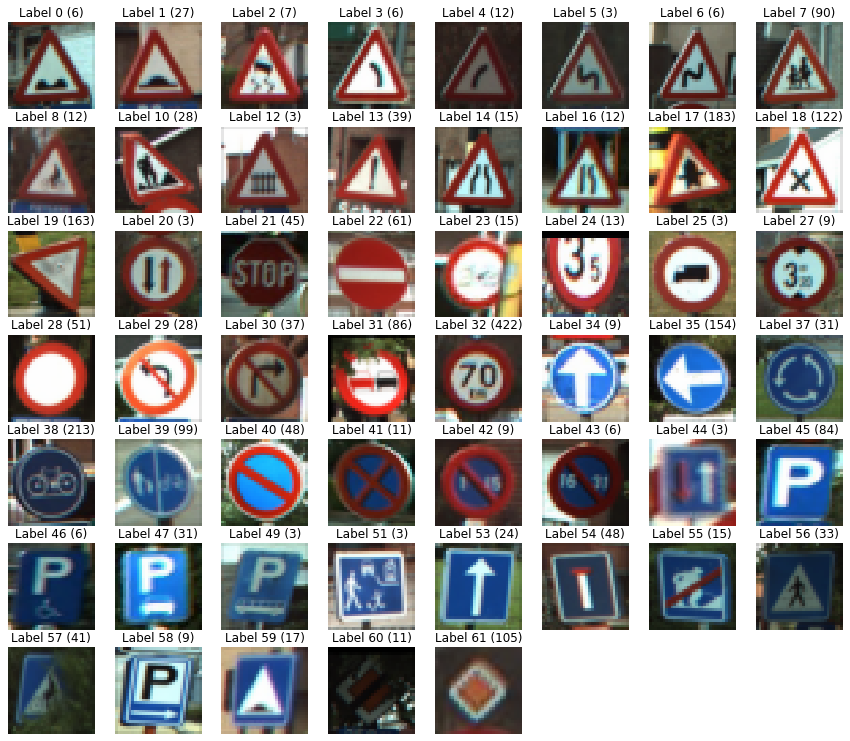

In [16]:
test_X, test_y = load_data(test_data_dir)

# Transform the images, just like we did with the training set.
test_images32 = [skimage.transform.resize(img, (32, 32), mode='constant') for img in test_X]
display_images_and_labels(test_images32, test_y)

In [26]:
print((test_images32[2].shape))

(32, 32, 3)


In [28]:
test_images32 = np.array(test_images32)
new_model = tf.keras.models.load_model('traffic-CNN.model')
predictions = new_model.predict(test_images32)
print(predictions)

[[4.7879769e-03 9.4507039e-01 3.1863181e-09 ... 7.1535636e-05
  1.1228297e-12 2.7162053e-10]
 [4.1633113e-03 9.8677558e-01 1.1592010e-09 ... 1.3534748e-04
  6.9192590e-12 5.5965742e-11]
 [4.1274908e-03 9.8115200e-01 4.1946022e-10 ... 3.6473677e-04
  4.0382008e-12 1.5663137e-11]
 ...
 [2.5863742e-10 6.4972937e-11 4.7550950e-09 ... 1.1317738e-09
  1.3092838e-05 2.5578301e-02]
 [2.6242991e-10 8.3285087e-11 3.7770471e-09 ... 1.1758580e-09
  9.9273375e-06 5.8960266e-02]
 [2.1102527e-10 7.9252598e-11 5.4415001e-09 ... 9.8279773e-10
  1.1579900e-05 5.8234099e-02]]


In [35]:
print(np.argmax(predictions[34]))
print(test_y[34])

2
2


In [60]:
# Display the predictions and the ground truth visually.
#fig = plt.figure(figsize=(5, 5))
f=0
d=0
for i in range(len(test_images32)):
    truth = test_y[i]
    prediction = np.argmax(predictions[i])
   # plt.subplot(5, 2,1+i)
   # plt.axis('off')
    if truth == prediction:
        f=f+1
    #d+=1 if truth =! prediction else d
   # plt.text(40, 10, "Truth: {0}\nPrediction:     {1}".format(truth, prediction), fontsize=12, color=color)
   # plt.imshow(test_images32[i])


In [62]:
print(f)
print(len(test_y))

2318
2520


In [65]:
acurccy=f*100/len(test_y)
print(acurccy)

91.98412698412699
